In [361]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [362]:
labour = pd.read_excel(r"F:\project\labour tracking system1.xlsx")

In [363]:
labour.shape

(321, 21)

In [364]:
labour

,Emp_ID,Name,Age,Gender,Nationality,Work Date,Site,Rfid,Latitude,Longitude,...,Infrared_Sensor,Gas_Sensor,Galvanic_Skin_Response_Sensor,Temperature,BVP,RR,HR,Work_Position,Attendance,Output
0,2172,James,46,Male,Japan,2022-10-25,Site 2,201303250000CD0000105,17.237036,78.576853,...,No,No,6.84,33.55,-18.39,15.6,123,Moving Bricks,No,Productive
1,1346,Robert,36,Male,Japan,2022-10-25,Site 3,201303250000CD0000106,17.237130,78.576856,...,Yes,No,6.59,33.55,-45.77,15.6,122,Welding,No,Productive
2,2207,John,25,Male,China,2022-10-25,Site 1,201303250000CD0000107,17.237191,78.576956,...,No,Yes,6.98,33.59,70.09,15.0,122,Moving Stones,Yes,Productive
3,4950,Mary,39,Female,Malaysia,2022-10-25,Site 2,201303250000CD0000108,17.237225,78.576860,...,Yes,No,6.98,33.59,-48.23,15.0,121,Welding,No,Productive
4,2016,Michael,51,Male,China,2022-10-25,Site 2,201303250000CD0000109,17.237282,78.576833,...,Yes,No,7.09,33.57,7.87,14.7,120,Cutting Bricks,No,Productive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,E1002360,Haebey,37,Male,Philippines,2022-10-25,Site 1,201303250000CD0000390,17.236483,78.577594,...,No,No,11.72,33.54,64.28,16.9,132,Re-Bar,No,Non Productivity
317,E1002361,Haydnen,36,Male,Malaysia,2022-10-25,Site 2,201303250000CD0000392,17.236537,78.577524,...,No,Yes,10.32,34.11,61.01,20.6,153,Re-Bar,Yes,Non Productivity
318,E1002362,Heater,36,Male,China,2022-10-25,Site 1,201303250000CD0000394,17.236416,78.577610,...,Yes,Yes,10.32,34.13,37.73,21.1,155,Re-Bar,Yes,Non Productivity
319,E1002363,Heny,31,Male,Malaysia,2022-10-25,Site 2,201303250000CD0000398,17.236464,78.577399,...,Yes,No,10.34,34.15,-6.29,21.1,157,Re-Bar,No,Non Productivity


In [365]:
labour.isna().sum()
# No null values Present

Emp_ID                           0
Name                             0
Age                              0
Gender                           0
Nationality                      0
Work Date                        0
Site                             0
Rfid                             0
Latitude                         0
Longitude                        0
Noise_Detection                  0
Infrared_Sensor                  0
Gas_Sensor                       0
Galvanic_Skin_Response_Sensor    0
Temperature                      0
BVP                              0
RR                               0
HR                               0
Work_Position                    0
Attendance                       0
Output                           0
dtype: int64

In [366]:
labour.duplicated()

# No Duplicate Values Present

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Length: 321, dtype: bool

In [367]:
#To view the categorical and numerical columns and its datatypes in the dataset                                    
labour.info()           # 8 numerical and 12 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Emp_ID                         321 non-null    object        
 1   Name                           321 non-null    object        
 2   Age                            321 non-null    int64         
 3   Gender                         321 non-null    object        
 4   Nationality                    321 non-null    object        
 5   Work Date                      321 non-null    datetime64[ns]
 6   Site                           321 non-null    object        
 7   Rfid                           321 non-null    object        
 8   Latitude                       321 non-null    float64       
 9   Longitude                      321 non-null    float64       
 10  Noise_Detection                321 non-null    object        
 11  Infrared_Sensor    

In [368]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc = LabelEncoder()
for i in (3,4,6,10,11,12,18,19,20):
    labour.iloc[:,i] = enc.fit_transform(labour.iloc[:,i])
labour

,Emp_ID,Name,Age,Gender,Nationality,Work Date,Site,Rfid,Latitude,Longitude,...,Infrared_Sensor,Gas_Sensor,Galvanic_Skin_Response_Sensor,Temperature,BVP,RR,HR,Work_Position,Attendance,Output
0,2172,James,46,1,2,2022-10-25,1,201303250000CD0000105,17.237036,78.576853,...,0,0,6.84,33.55,-18.39,15.6,123,9,0,1
1,1346,Robert,36,1,2,2022-10-25,2,201303250000CD0000106,17.237130,78.576856,...,1,0,6.59,33.55,-45.77,15.6,122,13,0,1
2,2207,John,25,1,1,2022-10-25,0,201303250000CD0000107,17.237191,78.576956,...,0,1,6.98,33.59,70.09,15.0,122,10,1,1
3,4950,Mary,39,0,3,2022-10-25,1,201303250000CD0000108,17.237225,78.576860,...,1,0,6.98,33.59,-48.23,15.0,121,13,0,1
4,2016,Michael,51,1,1,2022-10-25,1,201303250000CD0000109,17.237282,78.576833,...,1,0,7.09,33.57,7.87,14.7,120,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,E1002360,Haebey,37,1,5,2022-10-25,0,201303250000CD0000390,17.236483,78.577594,...,0,0,11.72,33.54,64.28,16.9,132,12,0,0
317,E1002361,Haydnen,36,1,3,2022-10-25,1,201303250000CD0000392,17.236537,78.577524,...,0,1,10.32,34.11,61.01,20.6,153,12,1,0
318,E1002362,Heater,36,1,1,2022-10-25,0,201303250000CD0000394,17.236416,78.577610,...,1,1,10.32,34.13,37.73,21.1,155,12,1,0
319,E1002363,Heny,31,1,3,2022-10-25,1,201303250000CD0000398,17.236464,78.577399,...,1,0,10.34,34.15,-6.29,21.1,157,12,0,0


In [369]:
# Data Cleaning
#Dropping the columns not necessary for analysis
labour=labour.drop(['Emp_ID','Name','Nationality','Work Date','Rfid','Latitude','Longitude','BVP'],axis=1)

In [370]:
labour

,Age,Gender,Site,Noise_Detection,Infrared_Sensor,Gas_Sensor,Galvanic_Skin_Response_Sensor,Temperature,RR,HR,Work_Position,Attendance,Output
0,46,1,1,1,0,0,6.84,33.55,15.6,123,9,0,1
1,36,1,2,1,1,0,6.59,33.55,15.6,122,13,0,1
2,25,1,0,0,0,1,6.98,33.59,15.0,122,10,1,1
3,39,0,1,1,1,0,6.98,33.59,15.0,121,13,0,1
4,51,1,1,0,1,0,7.09,33.57,14.7,120,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,37,1,0,0,0,0,11.72,33.54,16.9,132,12,0,0
317,36,1,1,1,0,1,10.32,34.11,20.6,153,12,1,0
318,36,1,0,1,1,1,10.32,34.13,21.1,155,12,1,0
319,31,1,1,1,1,0,10.34,34.15,21.1,157,12,0,0


In [371]:
labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            321 non-null    int64  
 1   Gender                         321 non-null    int32  
 2   Site                           321 non-null    int32  
 3   Noise_Detection                321 non-null    int32  
 4   Infrared_Sensor                321 non-null    int32  
 5   Gas_Sensor                     321 non-null    int32  
 6   Galvanic_Skin_Response_Sensor  321 non-null    float64
 7   Temperature                    321 non-null    float64
 8   RR                             321 non-null    float64
 9   HR                             321 non-null    int64  
 10  Work_Position                  321 non-null    int32  
 11  Attendance                     321 non-null    int32  
 12  Output                         321 non-null    int

In [372]:
#To check imbalance 
labour['Output'].value_counts() 
#3 good, average, poor - 3 classes in taget feature

1    252
0     69
Name: Output, dtype: int64

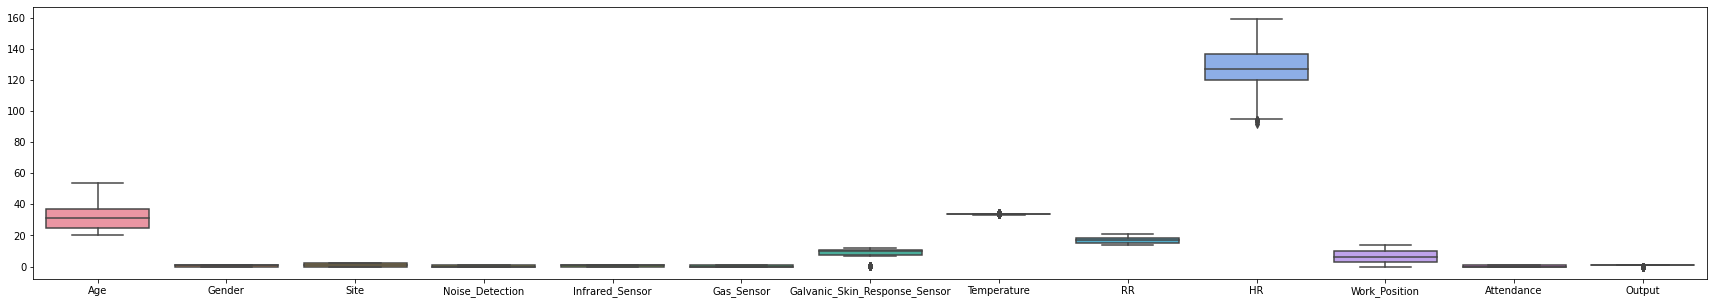

In [373]:
#boxplot - checking presence of outliers
fig=plt.figure(figsize=(30,5))
sns.boxplot(data= labour)
plt.show()

# Age and Experience has Outliers

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Site'}>,
        <AxesSubplot:title={'center':'Noise_Detection'}>],
       [<AxesSubplot:title={'center':'Infrared_Sensor'}>,
        <AxesSubplot:title={'center':'Gas_Sensor'}>,
        <AxesSubplot:title={'center':'Galvanic_Skin_Response_Sensor'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RR'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'Work_Position'}>,
        <AxesSubplot:title={'center':'Attendance'}>],
       [<AxesSubplot:title={'center':'Output'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

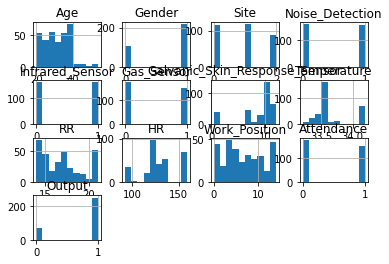

In [374]:
# histogram
labour.hist() # overall distribution of data

<AxesSubplot:xlabel='Age', ylabel='Count'>

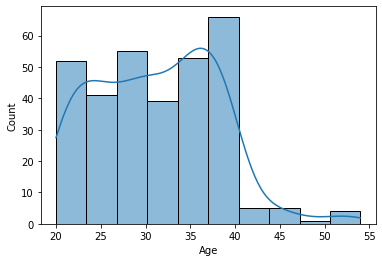

In [375]:
sns.histplot(data=labour, x='Age', kde=True)
# observation: 
    # age is slightly skewed. (right skewed)

<AxesSubplot:xlabel='Work_Position', ylabel='Count'>

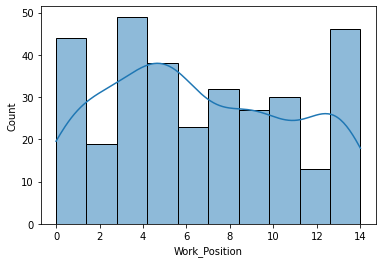

In [376]:
sns.histplot(data=labour, x='Work_Position', kde=True)

<AxesSubplot:xlabel='count', ylabel='Work_Position'>

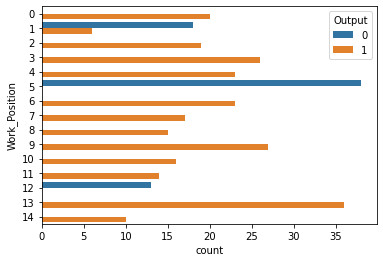

In [377]:
sns.countplot(y='Work_Position', hue="Output", data=labour)

Text(0.5, 1.0, 'Work_Position')

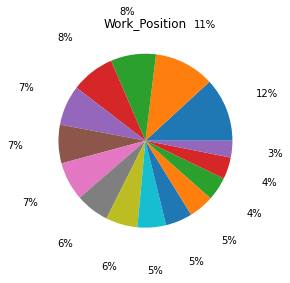

In [378]:
plt.pie(labour.Work_Position.value_counts(), autopct='%1.f%%', pctdistance=1.5)
plt.title('Work_Position')  # imbalanced dataset

Text(0.5, 1.0, 'Output')

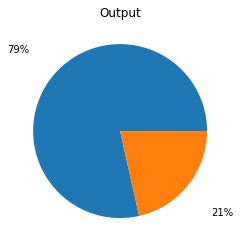

In [379]:
plt.pie(labour.Output.value_counts(), autopct='%1.f%%', pctdistance=1.5)
plt.title('Output')  

# shows 78% productivity & 22% Non-Productivity

In [380]:
#Correlation 
corrMatrix = labour.corr()
corrMatrix

,Age,Gender,Site,Noise_Detection,Infrared_Sensor,Gas_Sensor,Galvanic_Skin_Response_Sensor,Temperature,RR,HR,Work_Position,Attendance,Output
Age,1.000000,0.016938,-0.003414,0.087385,0.004878,0.006521,-0.049897,-0.037618,-0.020222,-0.012522,-0.018587,0.006521,0.046056
Gender,0.016938,1.000000,-0.059990,0.017749,0.035373,0.005478,0.304456,0.033244,0.155607,0.248185,0.049707,0.005478,-0.025380
Site,-0.003414,-0.059990,1.000000,-0.000343,0.016069,0.062382,-0.034410,0.071066,0.007007,0.011780,0.003669,0.062382,-0.019320
Noise_Detection,0.087385,0.017749,-0.000343,1.000000,-0.015567,0.040379,0.067877,0.078476,0.052782,0.096814,-0.029205,0.040379,-0.039548
Infrared_Sensor,0.004878,0.035373,0.016069,-0.015567,1.000000,-0.027880,0.012260,0.173934,0.202182,0.154233,0.076649,-0.027880,-0.051455
Gas_Sensor,0.006521,0.005478,0.062382,0.040379,-0.027880,1.000000,-0.073332,0.057780,0.060888,-0.021246,-0.118147,1.000000,-0.109337
Galvanic_Skin_Response_Sensor,-0.049897,0.304456,-0.034410,0.067877,0.012260,-0.073332,1.000000,0.421740,-0.029111,0.753912,0.057476,-0.073332,-0.153006
Temperature,-0.037618,0.033244,0.071066,0.078476,0.173934,0.057780,0.421740,1.000000,0.677414,0.828622,0.065772,0.057780,-0.292294
RR,-0.020222,0.155607,0.007007,0.052782,0.202182,0.060888,-0.029111,0.677414,1.000000,0.554759,0.063776,0.060888,-0.254300
HR,-0.012522,0.248185,0.011780,0.096814,0.154233,-0.021246,0.753912,0.828622,0.554759,1.000000,0.085751,-0.021246,-0.281641


In [381]:
labour.shape

(321, 13)

<AxesSubplot:>

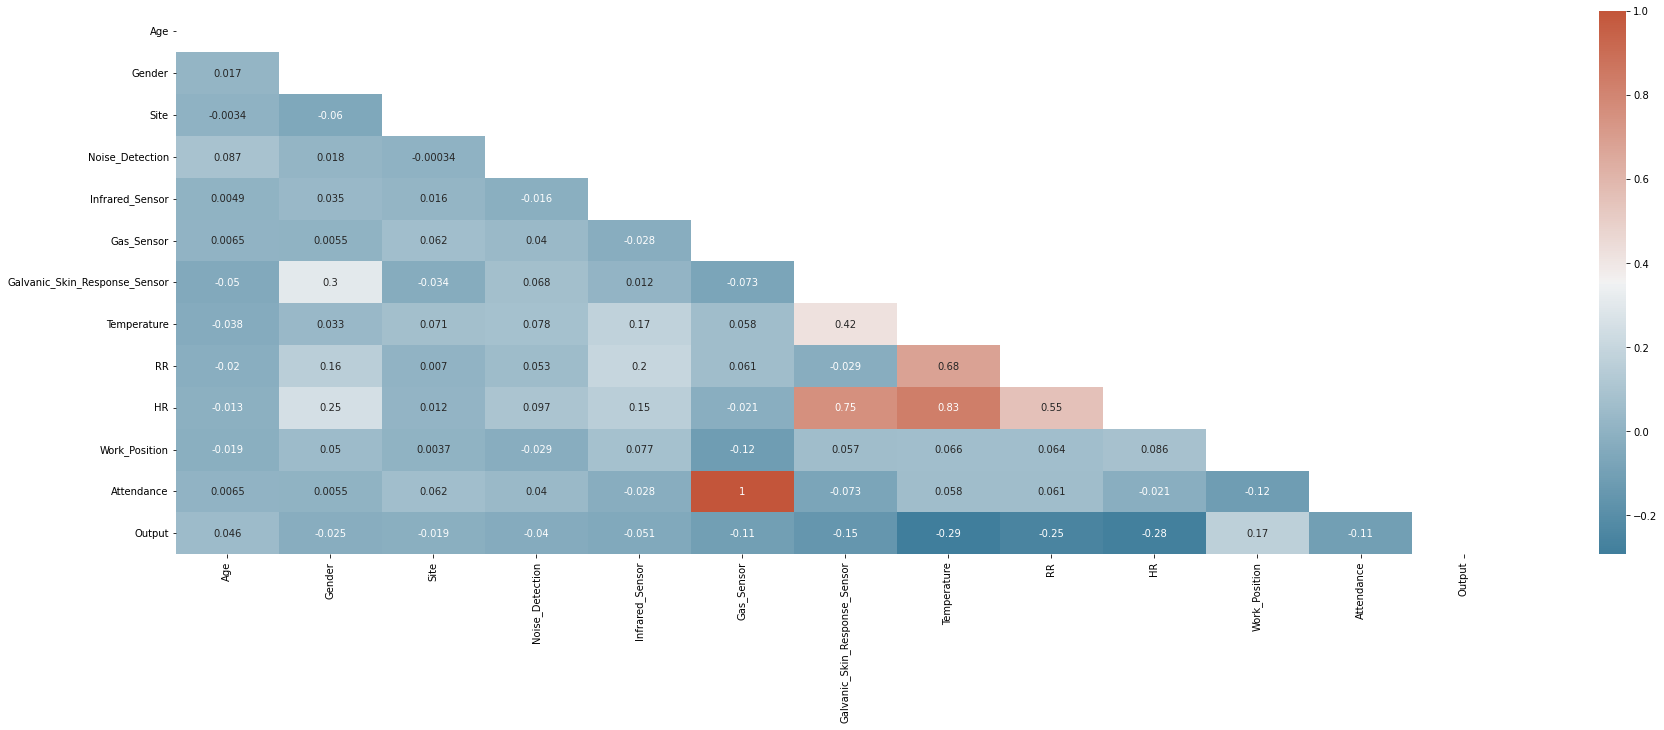

In [382]:
# Correlation between different variables
corr = labour.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
#Attendance and working hrs per day have strong correlation
#netconnectivity and workfromhome has strong correlation
#performance rating has positive and negative correlation with the features

<AxesSubplot:>

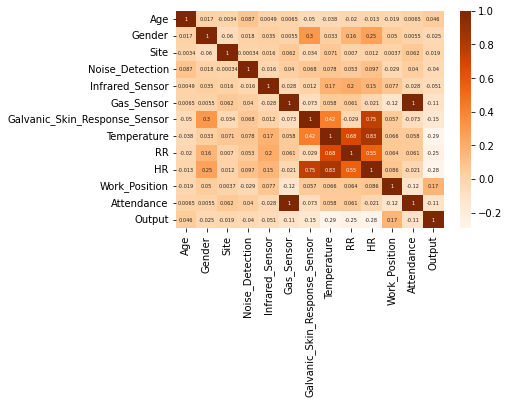

In [383]:
# Heat map and Correlation CoiForesticient
sns.heatmap(labour.iloc[:,0:13].corr(), annot = True, annot_kws={"size": 5}, cmap = 'Oranges')

In [384]:
#Automatic EDA : Pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(labour)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [385]:
#DEsicion tree

#Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score,confusion_matrix

#separating dependent and independent columns 
X = labour.iloc[:,0:12]  #independent columns
y = labour.iloc[:,-1]    #target column

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
labour_scaled = pd.DataFrame(scaler.fit_transform(labour.iloc[:, 0:12]))
labour[labour.columns[0:12]] = labour_scaled[labour_scaled.columns[0:12]]


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30) # 70% training and 30% test

     
# Model building for Decision Tree

dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)

dtc.fit(X_train,y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}') 
print(f'Test score {accuracy_score(y_test_pred,y_test)}') 

# confusion matrix for performance metrics
cm = confusion_matrix(y_test, y_test_pred)
cm
# or
pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predictions'])

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

# =============================================================

Train score 0.9464285714285714
Test score 0.9278350515463918
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.97      0.94      0.96        83

    accuracy                           0.93        97
   macro avg       0.84      0.90      0.87        97
weighted avg       0.94      0.93      0.93        97



In [386]:
# -----------------------

import pickle

# open the pickle file in writebyte mode
file = open("model.pkl",'wb')
#dump information to that file
pickle.dump(dtc, file)
file.close()

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))